In [1]:
import nltk

In [2]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\danca\AppData\Roaming\nltk_data...


True

In [3]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [7]:
sid = SentimentIntensityAnalyzer()

In [5]:
a = "This is a good movie"

In [6]:
sid.polarity_scores(a)

{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}

In [10]:
b = 'This Niggers are fucking rude'

In [11]:
sid.polarity_scores(b)

{'neg': 0.452, 'neu': 0.548, 'pos': 0.0, 'compound': -0.5095}

In [12]:
b= 'This Niggers are so FUCKING RUDE!!! Fuck Them'

In [13]:
sid.polarity_scores(b)

{'neg': 0.64, 'neu': 0.36, 'pos': 0.0, 'compound': -0.9127}

# USing Vader To analyze amazon Reviews 

In [20]:
import pandas as pd
import seaborn as sns

In [16]:
df = pd.read_csv('C:/Users/danca/Music/NLP/TextFiles/amazonreviews.tsv',sep='\t')

In [17]:
df.head()

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."


In [19]:
df['label'].value_counts()

neg    5097
pos    4903
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

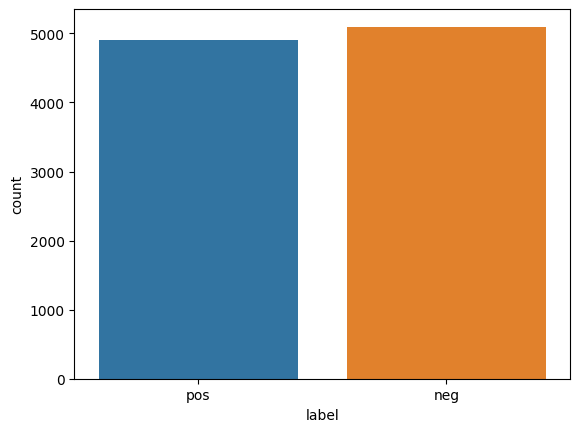

In [21]:
sns.countplot(x='label',data=df)

In [22]:
# checking null values

In [23]:
df.isnull().sum()

label     0
review    0
dtype: int64

In [24]:
# dropping empty wide spaces ' '

In [25]:
blanks = []

for i,lb,rv in df.itertuples():
    if type(rv)==str:
        if rv.isspace():
            blanks.append(i)
print(blanks)    

[]


In [28]:
sid.polarity_scores(df.iloc[0]['review'])

{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'compound': 0.9454}

In [29]:
df['scores'] = df['review'].apply(lambda review: sid.polarity_scores(review))

In [30]:
df.head()

,label,review,scores
0,pos,Stuning even for the non-gamer: This sound tra...,"{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'co..."
1,pos,The best soundtrack ever to anything.: I'm rea...,"{'neg': 0.018, 'neu': 0.837, 'pos': 0.145, 'co..."
2,pos,Amazing!: This soundtrack is my favorite music...,"{'neg': 0.04, 'neu': 0.692, 'pos': 0.268, 'com..."
3,pos,Excellent Soundtrack: I truly like this soundt...,"{'neg': 0.09, 'neu': 0.615, 'pos': 0.295, 'com..."
4,pos,"Remember, Pull Your Jaw Off The Floor After He...","{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp..."


In [31]:
df['compound'] = df['scores'].apply(lambda d:d['compound'])

In [32]:
df.head()

,label,review,scores,compound
0,pos,Stuning even for the non-gamer: This sound tra...,"{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'co...",0.9454
1,pos,The best soundtrack ever to anything.: I'm rea...,"{'neg': 0.018, 'neu': 0.837, 'pos': 0.145, 'co...",0.8957
2,pos,Amazing!: This soundtrack is my favorite music...,"{'neg': 0.04, 'neu': 0.692, 'pos': 0.268, 'com...",0.9858
3,pos,Excellent Soundtrack: I truly like this soundt...,"{'neg': 0.09, 'neu': 0.615, 'pos': 0.295, 'com...",0.9814
4,pos,"Remember, Pull Your Jaw Off The Floor After He...","{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp...",0.9781


In [33]:
df['compo_scores'] = df['compound'].apply(lambda score : 'pos' if score >=0 else 'neg')

In [34]:
df.head()

,label,review,scores,compound,compo_scores
0,pos,Stuning even for the non-gamer: This sound tra...,"{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'co...",0.9454,pos
1,pos,The best soundtrack ever to anything.: I'm rea...,"{'neg': 0.018, 'neu': 0.837, 'pos': 0.145, 'co...",0.8957,pos
2,pos,Amazing!: This soundtrack is my favorite music...,"{'neg': 0.04, 'neu': 0.692, 'pos': 0.268, 'com...",0.9858,pos
3,pos,Excellent Soundtrack: I truly like this soundt...,"{'neg': 0.09, 'neu': 0.615, 'pos': 0.295, 'com...",0.9814,pos
4,pos,"Remember, Pull Your Jaw Off The Floor After He...","{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp...",0.9781,pos


# Overal accuracy

In [35]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [36]:
accuracy_score(df['label'],df['compo_scores'])

0.7097

In [37]:
print(classification_report(df['label'],df['compo_scores']))

              precision    recall  f1-score   support

         neg       0.86      0.52      0.64      5097
         pos       0.64      0.91      0.75      4903

    accuracy                           0.71     10000
   macro avg       0.75      0.71      0.70     10000
weighted avg       0.75      0.71      0.70     10000



In [38]:
print(confusion_matrix(df['label'],df['compo_scores']))

[[2629 2468]
 [ 435 4468]]
